# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from ddpg_agent import Agent
from collections import deque
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
def ddpg(n_episodes=500, max_t=1000, print_every=1, train_mode=True):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        print_every (int)     : interval to display results

    """
    mean_scores = []                               # list of mean scores from each episode
    min_scores = []                                # list of lowest scores from each episode
    max_scores = []                                # list of highest scores from each episode
    scores_window = deque(maxlen=100)              # mean scores from last 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        agent.reset()

        for t in range(max_t):
            actions = agent.act(states, add_noise=True)         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)     
                
            states = next_states
            scores += rewards        
            if np.any(dones):                                   # exit loop when episode ends
                break

        min_scores.append(np.min(scores))             # save lowest score for a single agent
        max_scores.append(np.max(scores))             # save highest score for a single agent        
        mean_scores.append(np.mean(scores))           # save mean score for the episode
        scores_window.append(mean_scores[-1])         # save mean score to window
                
        if i_episode % print_every == 0:
            print('\rEpisode {}  \tMin: {:.1f}\tMax: {:.1f}\tMean: {:.1f}'.format(\
                  i_episode, min_scores[-1], max_scores[-1], mean_scores[-1]))
                  
        if np.mean(scores_window) >= 30:
            print('\nEnvironment SOLVED in {} episodes!\tMean Score ={:.1f}'.format(\
            i_episode, mean_scores[-1]))            
            if train_mode:
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
            break
            
    return mean_scores

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores = ddpg()

Episode 1  	Min: 0.2	Max: 1.8	Mean: 0.7
Episode 2  	Min: 0.3	Max: 2.9	Mean: 1.5
Episode 3  	Min: 0.2	Max: 3.3	Mean: 1.8
Episode 4  	Min: 1.8	Max: 4.8	Mean: 3.2
Episode 5  	Min: 2.0	Max: 7.2	Mean: 3.9
Episode 6  	Min: 1.3	Max: 5.5	Mean: 3.5
Episode 7  	Min: 2.7	Max: 9.3	Mean: 5.2
Episode 8  	Min: 2.5	Max: 9.8	Mean: 5.3
Episode 9  	Min: 4.5	Max: 9.8	Mean: 7.1
Episode 10  	Min: 4.0	Max: 12.6	Mean: 8.6
Episode 11  	Min: 6.7	Max: 17.7	Mean: 10.1
Episode 12  	Min: 1.1	Max: 17.4	Mean: 10.9
Episode 13  	Min: 2.3	Max: 15.5	Mean: 9.6
Episode 14  	Min: 6.6	Max: 18.6	Mean: 11.9
Episode 15  	Min: 9.5	Max: 19.2	Mean: 15.0
Episode 16  	Min: 7.1	Max: 18.6	Mean: 14.0
Episode 17  	Min: 11.4	Max: 24.9	Mean: 18.3
Episode 18  	Min: 11.0	Max: 22.7	Mean: 17.9
Episode 19  	Min: 9.8	Max: 28.2	Mean: 18.4
Episode 20  	Min: 11.4	Max: 26.2	Mean: 18.3
Episode 21  	Min: 10.1	Max: 29.5	Mean: 21.3
Episode 22  	Min: 10.5	Max: 27.1	Mean: 19.1
Episode 23  	Min: 14.1	Max: 35.4	Mean: 23.1
Episode 24  	Min: 8.8	Max: 26.8	Me

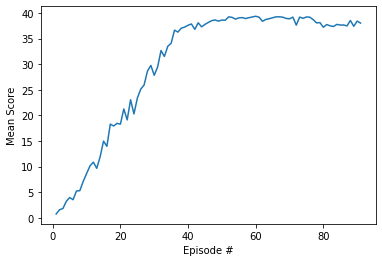

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Mean Score')
plt.xlabel('Episode #')
plt.show()